In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm

# 以上是這次過程中需要的package

In [2]:
cur = pd.read_csv("D:/currencynew.csv")  

In [3]:
cur.head()    

# 透過 head 這個 method ,我們可以呼叫cur的前一小部分出來確認讀入內容是否是我們要的樣子
#但又不像直接呼叫cur一樣跑出一長串列表,干擾我們閱讀
#現在我們看到檔案如同我們所要的樣子被讀入了,但我們不想要第一行,也就是Date那行,醜醜的

,Date,EUR,GBP,JPY,reur,rgbp,rjpy
0,7-Jul-02,1.0274,0.6575,120.21,NaN,NaN,NaN
1,8-Jul-02,1.0261,0.6570,120.04,-0.126613,-0.076075,-0.141519
2,9-Jul-02,1.0096,0.6474,118.40,-1.621099,-1.471968,-1.375630
3,10-Jul-02,1.0065,0.6457,118.06,-0.307525,-0.262934,-0.287575
4,11-Jul-02,1.0119,0.6463,117.69,0.535079,0.092879,-0.313892


In [4]:
cur = cur.drop('Date',axis = 1)   

# 所以我們來把 Date 那一行給去掉,但因為drop這個方法默認是刪掉列
#所以我們要把方法中設定的 axis = 0
# 也就是默認是'橫軸', 改成 axis = 1 這樣他就知道我們要操作的方式是在縱軸上 的 'Date' 這一行
# 這樣我們就能看到 Date 這一行被我去掉了,接下因為我們的資料是時間序列,所以我們要把 index
# 從 0.1.2.3.4.....1826 通通改成時間,這樣再後續的 VAR model 裡他才能順利做各式檢定
        
print(np.shape(cur))
cur.head()

(3988, 6)


,EUR,GBP,JPY,reur,rgbp,rjpy
0,1.0274,0.6575,120.21,NaN,NaN,NaN
1,1.0261,0.6570,120.04,-0.126613,-0.076075,-0.141519
2,1.0096,0.6474,118.40,-1.621099,-1.471968,-1.375630
3,1.0065,0.6457,118.06,-0.307525,-0.262934,-0.287575
4,1.0119,0.6463,117.69,0.535079,0.092879,-0.313892


In [7]:
date = pd.date_range('2002-7-7','2013-6-6')  

# 首先我們先生成我們所需要的時間長度,我就直接從excel裡的檔案看是幾月幾號到幾月幾號
# 附帶一提,為什麼一開始不直接把 Date 那一行資料設定為 index呢? 這樣就不用重新再造
# 一個時間去當index了, 主要是因為直接指定Date那一行作為index ,在dataframe裡好像
# 不會認為他是真正的 timeindex ,而是認為他是一串 string 做成的 index
# 這樣在後續的VAR model裡分析會出現錯誤,所以只好笨笨的重新建構一個可用dataframe
# 如果我有找到解決的辦法再通知大家

date               

DatetimeIndex(['2002-07-07', '2002-07-08', '2002-07-09', '2002-07-10',
               '2002-07-11', '2002-07-12', '2002-07-13', '2002-07-14',
               '2002-07-15', '2002-07-16',
               ...
               '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31',
               '2013-06-01', '2013-06-02', '2013-06-03', '2013-06-04',
               '2013-06-05', '2013-06-06'],
              dtype='datetime64[ns]', length=3988, freq='D')

In [8]:
cur_values = cur.values # 首先我們把原本資料中的值都取出來方便我們等等去構造一個新的 dataframe

In [9]:
cur = pd.DataFrame(cur_values,index = date,columns = ['EUR','GBP','JPY','reur','rgbp','rjpy'])

# 這部分是要求pandas創建一個 dataframe
# 數據部分就是我們剛剛取出來的cur_values
# index 是我們創出來 date
# 每一行的header分別是['EUR','GBP','JPY','reur','rgbp','rjpy']
# 到此步我們大致整理好所需要的原始資料了

In [12]:
print(np.shape(cur))        

# 確認一下資料有沒有問題,看起來一切都好,index也確實變成 timeindex 了
cur.head()

(3988, 6)


,EUR,GBP,JPY,reur,rgbp,rjpy
2002-07-07,1.0274,0.6575,120.21,NaN,NaN,NaN
2002-07-08,1.0261,0.6570,120.04,-0.126613,-0.076075,-0.141519
2002-07-09,1.0096,0.6474,118.40,-1.621099,-1.471968,-1.375630
2002-07-10,1.0065,0.6457,118.06,-0.307525,-0.262934,-0.287575
2002-07-11,1.0119,0.6463,117.69,0.535079,0.092879,-0.313892


In [15]:
cur_return = cur[['reur','rgbp','rjpy']]

#為了方便我們操作,我們將return獨立出來
# cur[['reur','rgbp','rjpy']] 代表我們要這三行的資料,請注意有雙中括號
# 因為是return,所以第一期為 NaN,我們要去掉NaN避免後面出現錯誤
cur_return.head()

,reur,rgbp,rjpy
2002-07-07,NaN,NaN,NaN
2002-07-08,-0.126613,-0.076075,-0.141519
2002-07-09,-1.621099,-1.471968,-1.375630
2002-07-10,-0.307525,-0.262934,-0.287575
2002-07-11,0.535079,0.092879,-0.313892


In [16]:
cur_return = cur_return.dropna()  # cut NaN

In [17]:
cur_return.head()   

# 現在可以看到有NaN值的第一行被刪掉了,這個方法預設的刪法是只要該列有NaN就整列刪掉,但也可以透過
# cur.head(how = 'all') 這樣指定以後,只有整列都為NaN的值才會被刪掉
                                  
# 到這裡基本上後續要分析的原始資料都處理好了~~可以開開心心來跑時間序列咯~~啾咪 (^ ︿ ^)

,reur,rgbp,rjpy
2002-07-08,-0.126613,-0.076075,-0.141519
2002-07-09,-1.621099,-1.471968,-1.375630
2002-07-10,-0.307525,-0.262934,-0.287575
2002-07-11,0.535079,0.092879,-0.313892
2002-07-12,-0.049424,-0.465261,-0.605107


In [18]:
sm.stattools.adfuller(cur['EUR'])   

#對 EUR的匯率直接做 Auto-Dicky-Fuller test , return 的值由上到下分別是 
#(adf, pvalue, usedlag, nobs, critical values 其中nobs = number of observations

(-3.1308537987758385,
 0.024352539440466711,
 1,
 3986,
 {'1%': -3.4319916247463209,
  '10%': -2.5671561276258172,
  '5%': -2.8622653800145192},
 -33096.422978989853)

In [20]:
sm.stattools.adfuller(cur_return['reur'])  

#對 EUR的匯率的報酬率做 Auto-Dicky-Fuller test , return 的值由上到下分別是 
#(adf, pvalue, usedlag, nobs, critical values 其中nobs = number of observations

(-54.12875220230881,
 0.0,
 0,
 3986,
 {'1%': -3.4319916247463209,
  '10%': -2.5671561276258172,
  '5%': -2.8622653800145192},
 5215.5107817714279)

In [21]:
model = sm.VAR(cur_return) 

# 接下來要把這些資料fit進VAR的model裡,聽老師說用報酬率做是為了stationary
# 這部分需要記得上課內容的大大幫忙確認是否是用匯率的報酬率,感恩

In [22]:
model.select_order(10)      

# 因為等等fit model 的時候,要選定我們所要用的最大lag項,所以先讓他跑一個
# lag項從 0~10 各自的判斷標準是多少,從報表裡面看起來,選 p=2 看起來不錯
                                       

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -5.332       -5.327     0.004836       -5.330
1        -5.460      -5.441*     0.004254       -5.453
2       -5.468*       -5.435    0.004219*      -5.456*
3        -5.466       -5.418     0.004230       -5.449
4        -5.465       -5.403     0.004232       -5.443
5        -5.465       -5.389     0.004234       -5.438
6        -5.463       -5.373     0.004241       -5.431
7        -5.463       -5.359     0.004241       -5.426
8        -5.462       -5.344     0.004245       -5.420
9        -5.460       -5.327     0.004254       -5.413
10       -5.457       -5.310     0.004264       -5.405
* Minimum



{'aic': 2, 'bic': 1, 'fpe': 2, 'hqic': 2}

In [23]:
results = model.fit(2)  # model.fit(p) p代表用來擬合的 lag項要用 p個     

In [24]:
results.summary()       # 把報表叫出來 ,報表內容有上課應該都看得懂,就不多解釋了

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, Dec, 2016
Time:                     01:37:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -5.43680
Nobs:                     3985.00    HQIC:                  -5.45819
Log likelihood:          -6043.54    FPE:                 0.00421145
AIC:                     -5.46995    Det(Omega_mle):      0.00418934
--------------------------------------------------------------------
Results for equation reur
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.005836         0.007453           -0.783           0.434
L1.reur         0.200155         0.022708            8.814           0.000
L1.rgbp        -0.061566         0.024107           -2.554           0.011
L1.rjpy   

In [25]:
results.test_causality('reur', ['rgbp', 'rjpy'], kind='wald')   

# 然後是做Granger causality ,這個寫法代表 'GBP', 'JPY' 對 'EUR'
# 但是他原本預設是做 f-test ,所以我們要在後面將 kind='wald'
# 就是指定做  wald test

Granger causality wald-test
   Test statistic   Critical Value          p-value  df
-------------------------------------------------------
         7.911412         9.487729            0.095   4
H_0: ['rgbp', 'rjpy'] do not Granger-cause reur
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 9.487729036781154,
 'df': 4,
 'pvalue': 0.094877710792649839,
 'signif': 0.05,
 'statistic': 7.9114122791070489}

In [26]:
results.test_causality('rgbp', ['reur', 'rjpy'], kind='wald') 

# 其他的Granger causality ,這個寫法代表 'EUR', 'JPY' 對 'GBP'
# 但是他原本預設是做 f-test ,所以我們要在後面將 kind='wald'
# 就是指定做  wald test
#  Granger causality 示範先這樣

Granger causality wald-test
   Test statistic   Critical Value          p-value  df
-------------------------------------------------------
        28.045230         9.487729            0.000   4
H_0: ['reur', 'rjpy'] do not Granger-cause rgbp
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 9.487729036781154,
 'df': 4,
 'pvalue': 1.2212404736466893e-05,
 'signif': 0.05,
 'statistic': 28.0452301574838}

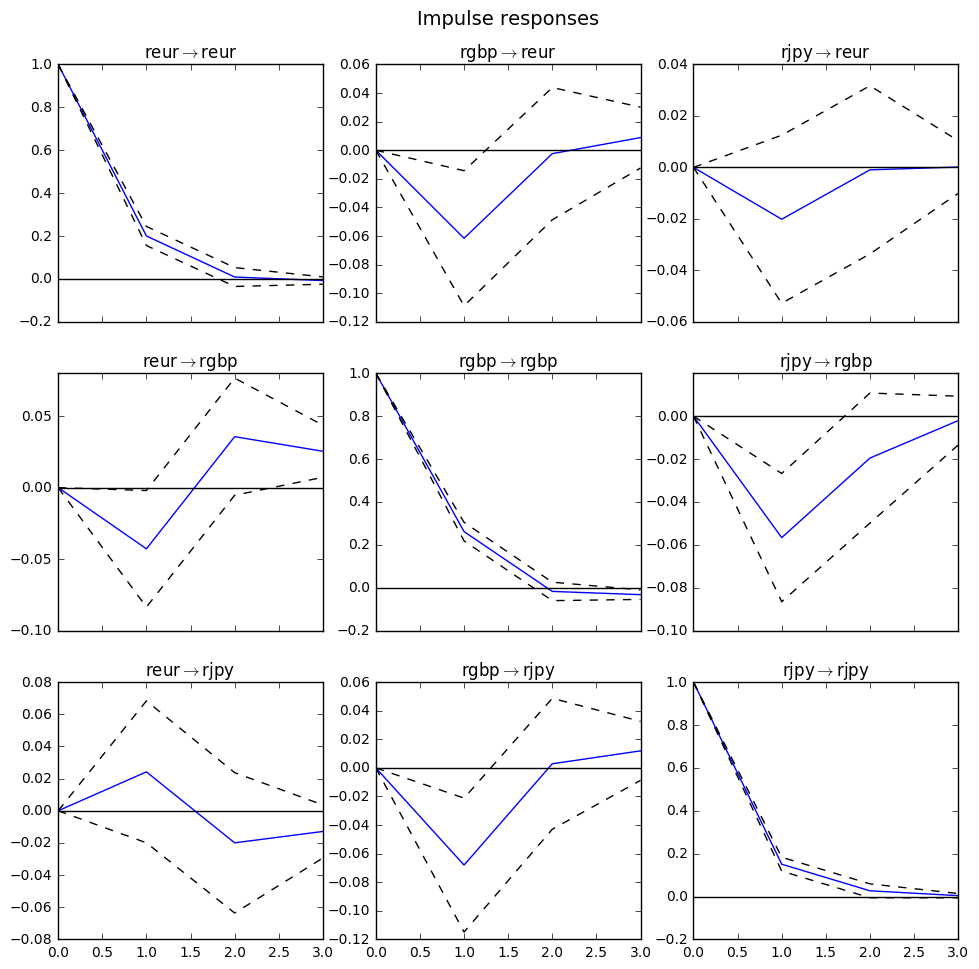

In [28]:
irf = results.irf(3)
irf.plot(orth=False)
plt.show()

# 接著作 Impulse Response Analysis ,因為irf本身是個惰性函數
# 所以我們做出來之後把他指定為一個變數,然後讓這個變數畫出來

In [29]:
fevd = results.fevd(3)                    
fevd.summary()                            

# 然後是老師說下次可能會做的 FEVD ,先附上,有更新再改
# 如果我有漏掉什麼或是哪部分講的不清楚麻煩跟我講,我會再修正
# 感謝大家
# by the way,現在用的檔案是老師新上傳的,不知道的人可以去信箱看看

FEVD for reur
         reur      rgbp      rjpy
0    1.000000  0.000000  0.000000
1    0.998118  0.001524  0.000358
2    0.998115  0.001526  0.000359

FEVD for rgbp
         reur      rgbp      rjpy
0    0.489516  0.510484  0.000000
1    0.478169  0.518544  0.003287
2    0.478141  0.518184  0.003675

FEVD for rjpy
         reur      rgbp      rjpy
0    0.077630  0.001328  0.921042
1    0.076305  0.003773  0.919922
2    0.076360  0.003771  0.919868


